(large_eddy)=
# Working with a 3D large eddy simulation of shallow convection

### The simulation

* Objective: compare a single column of a GCM with large eddy simlations for three different cloud types (stratus, stratocumulus, trade cumulus).  Basic approach is to run the same case studies twice.  Once using the physics from a single column of several global climate models:

[GCM paper](https://doi-org.ezproxy.library.ubc.ca/10.1002/2013MS000246)

and also with several large eddy models:

[LES paper](https://agupubs-onlinelibrary-wiley-com.ezproxy.library.ubc.ca/doi/abs/10.1002/jame.20025)

* We started with the trade cumulus simulation, then perturbed it by raising the temperature to 300 K and 301 K.

  - [cloud movie](https://www.dropbox.com/scl/fi/hvov84sqo3mtuggjrx8vo/cgils_ctl_s6_synthetic_albedo.mp4?rlkey=7hkd9n3k3mi834765kg8qp6kq&dl=0)

##  The netcdf dataset

In [1]:
import glob
from pathlib import Path
from netCDF4 import Dataset
import numpy as np
import xarray as xr

the_path = Path.home() / "Dropbox/phil_files/a405"
the_file = list(the_path.glob("**/ENT*nc"))[0]
print(the_file)

/Users/phil/Dropbox/phil_files/a405/ENT_CGILS_CTL_S6_3D_384x384x194_25m_1s_96_0000014160.nc


In [2]:
the_ds = xr.open_dataset(the_file).squeeze()
the_ds

<xarray.Dataset>
Dimensions:  (x: 384, y: 384, z: 194)
Coordinates:
  * x        (x) float32 0.0 25.0 50.0 75.0 ... 9.525e+03 9.55e+03 9.575e+03
  * y        (y) float32 0.0 25.0 50.0 75.0 ... 9.525e+03 9.55e+03 9.575e+03
  * z        (z) float32 12.5 37.5 62.5 87.5 ... 4.788e+03 4.812e+03 4.838e+03
    time     float32 208.2
Data variables:
    p        (z) float32 ...
    U        (z, y, x) float32 ...
    V        (z, y, x) float32 ...
    W        (z, y, x) float32 ...
    PP       (z, y, x) float32 ...
    QRAD     (z, y, x) float32 ...
    TABS     (z, y, x) float32 ...
    QV       (z, y, x) float32 ...
    QN       (z, y, x) float32 ...
    QP       (z, y, x) float32 ...
    CON      (z, y, x) float32 ...
    TR01     (z, y, x) float32 ...

### plot a liquid water cross section at 1 km

In [3]:
qn = the_ds['QN']
x, y, z = the_ds.x, the_ds.y, the_ds.z
x[-1].data,y[-1].data,z[-1].data

(array(9575., dtype=float32),
 array(9575., dtype=float32),
 array(4837.5, dtype=float32))

In [4]:
qn.shape

(194, 384, 384)

### Find the ver

In [5]:
level_1000 = np.searchsorted(z, 1000)
print(level_1000)

40


In [6]:
#
# get the cloud liquid water at 1000 m
#
horiz_cross_sec = qn[level_1000,:,:]
#
# find the cross section cloud fraction
#
cloud_frac=np.sum(horiz_cross_sec > 0)/horiz_cross_sec.size
print(f'cloud fraction: {cloud_frac:.3f}')

cloud fraction: 0.050


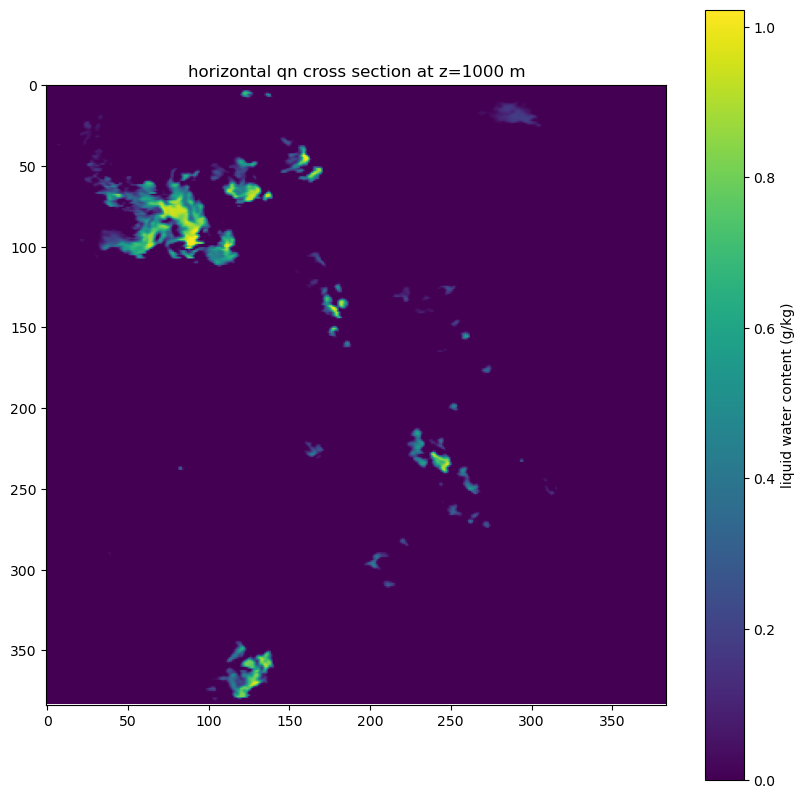

In [7]:
from matplotlib import pyplot as plt
fig,ax =plt.subplots(1,1,figsize=(10,10))
whole_scene=ax.imshow(horiz_cross_sec)
cax=plt.colorbar(whole_scene,ax=ax)
cax.set_label('liquid water content (g/kg)')
title = 'horizontal qn cross section at z=1000 m'
ax.set_title(title);

### zoom in on the northwest quadrant of the domain

Switch from [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) to 
[pcolormesh](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolormesh) so we can orient the axes along model x,y, and z coordinates.  Note that if y is north/south (north up), then imshow plots the image upside down.

Text(0.5, 1.0, 'zoomed horiz qn cross section at z=1000 m')

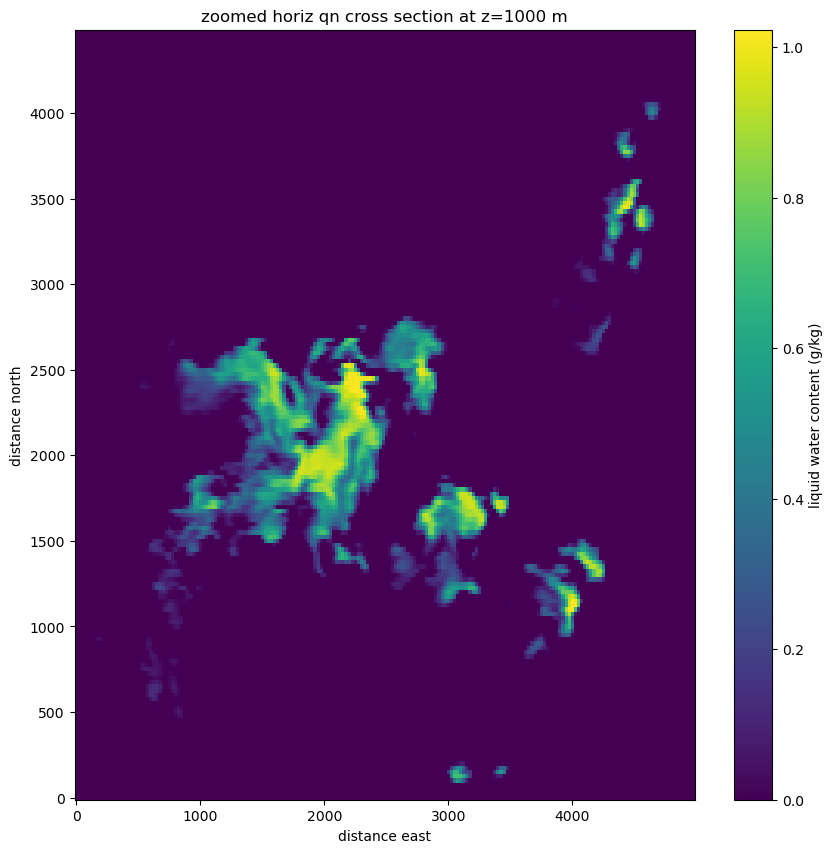

In [8]:
#
# it helps in checking your orientation to make the selection
# have different numbers of rows and columns
#
end_col = 200
end_row = 180
fig,ax =plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],y[:end_row],horiz_cross_sec[:end_row,:end_col])
ax.set(xlabel='distance east',ylabel='distance north')
cax = plt.colorbar(image,ax=ax)
cax.set_label('liquid water content (g/kg)')
ax.set_title('zoomed horiz qn cross section at z=1000 m')

### Get a vertical cross section along y = 2km

In [9]:
row_number_2000 = np.searchsorted(y,2000)  #(y index of 80)
print(f'y= 2km occurs at index {row_number_2000}')

y= 2km occurs at index 80


shape of cross section along y = 2000 m: (194, 200)


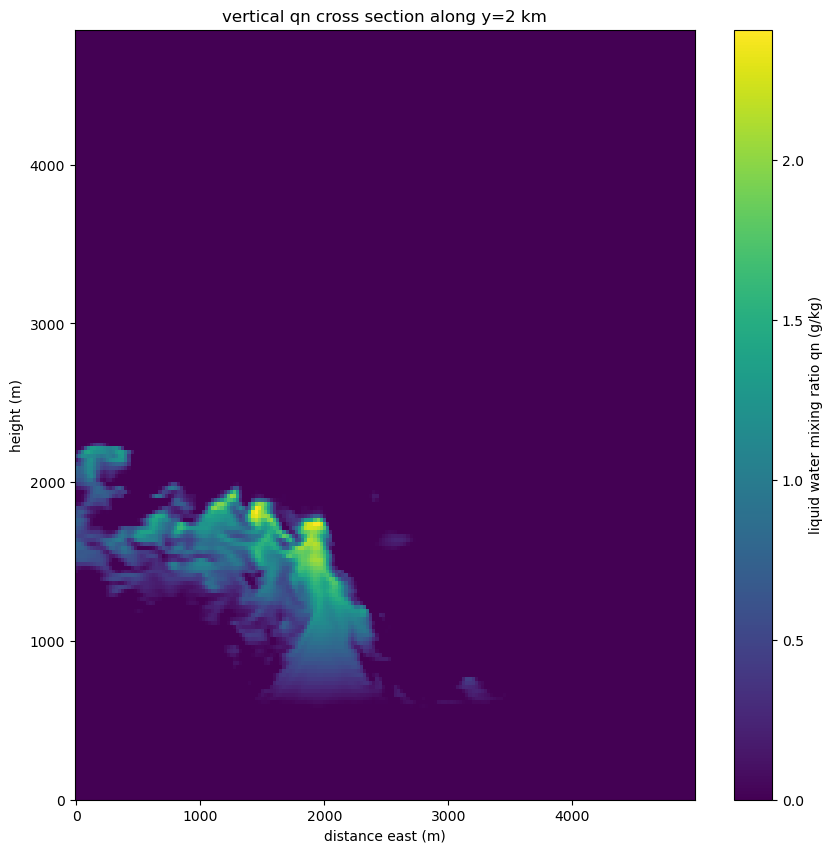

In [10]:
vert_cross_sec = qn[:,row_number_2000,:end_col]
print(f'shape of cross section along y = 2000 m: {vert_cross_sec.shape}')
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec[:,:end_col])
cax = plt.colorbar(image,ax=ax)
cax.set_label('liquid water mixing ratio qn (g/kg)')
ax.set_title('vertical qn cross section along y=2 km')
ax.set(xlabel='distance east (m)',ylabel='height (m)');

### Find the vapor mixing ratio along this cross section

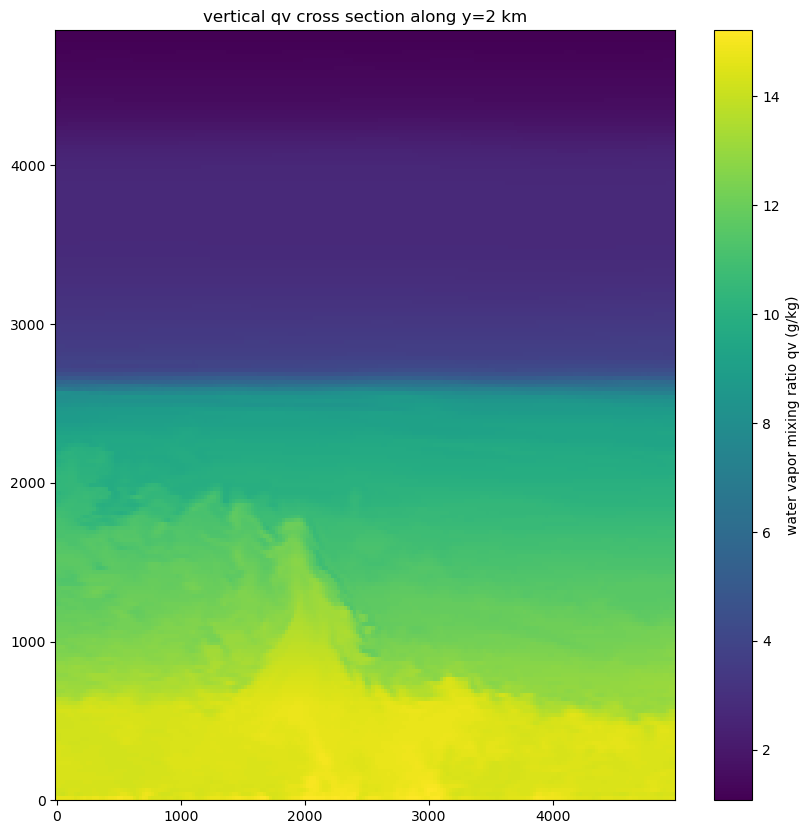

In [11]:
qv = the_ds['QV']
vert_cross_sec = qv[:,row_number_2000,:end_col]
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec[:,:end_col])
cax = plt.colorbar(image,ax=ax)
cax.set_label('water vapor mixing ratio qv (g/kg)')
ax.set_title('vertical qv cross section along y=2 km');

### For Wednesday

1\.  Read Thompkins chapter 4 parameterization notes through section 4.7.1


2\.  Hand in a notebook that adds cells to cgilsI.ipynb to:

     * use pcolormesh to plot a vertical cross section of the relative humidity for along y=2 km, x= 0-5 km
     
     * use plot to plot a vertical profile of the horizontal mean RH in for this cross section as a function of height
     
     * use plot to plot a vertical profile of the horizontal standard deviation of RH as a function of height

# vertical cross section of temperature

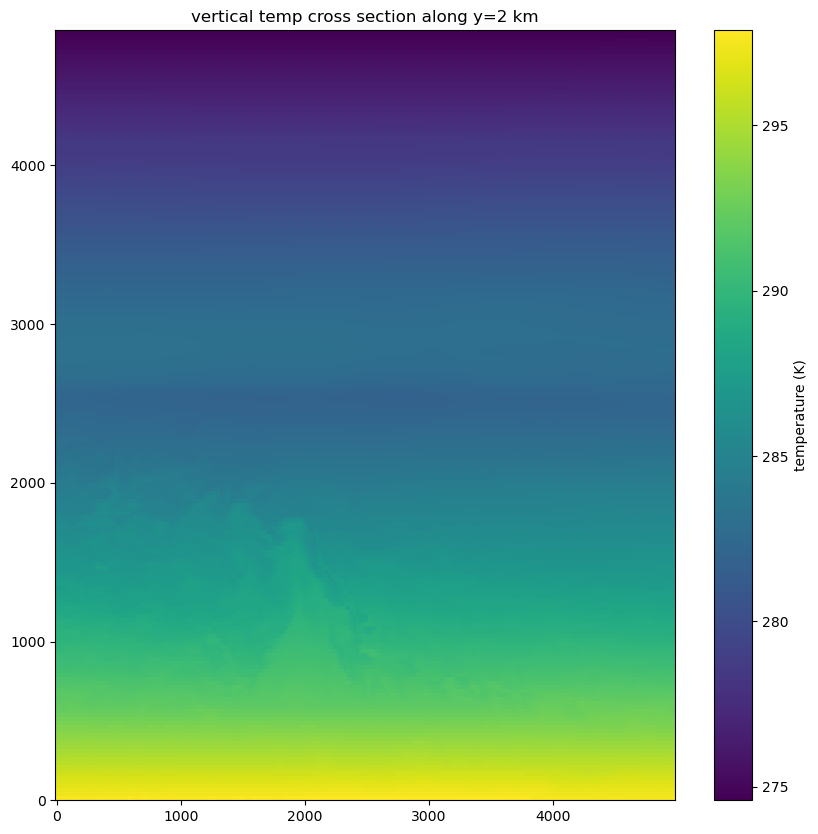

In [12]:
from a405.thermo.thermlib import find_rsat, find_esat
from a405.thermo.constants import constants as c
temp = the_ds['TABS']
press = the_ds['p']
vert_cross_sec_temp = temp[:,row_number_2000,:end_col]
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec_temp)
cax = plt.colorbar(image,ax=ax)
cax.set_label('temperature (K)')
ax.set_title('vertical temp cross section along y=2 km');

# Vertical cross section of relative humidity

use [broadcasting](https://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/) 
so I don't need to write a loop

In [13]:
press

<xarray.DataArray 'p' (z: 194)>
[194 values with dtype=float32]
Coordinates:
  * z        (z) float32 12.5 37.5 62.5 87.5 ... 4.788e+03 4.812e+03 4.838e+03
    time     float32 208.2
Attributes:
    units:      mb
    long_name:  pressure

In [14]:
press_np = press.data
type(press),type(press.data)

(xarray.core.dataarray.DataArray, numpy.ndarray)

In [15]:
press_np = press_np[...,np.newaxis,np.newaxis]*100.
press_np.shape,temp.shape

((194, 1, 1), (194, 384, 384))

esat shape: (194, 384, 384)


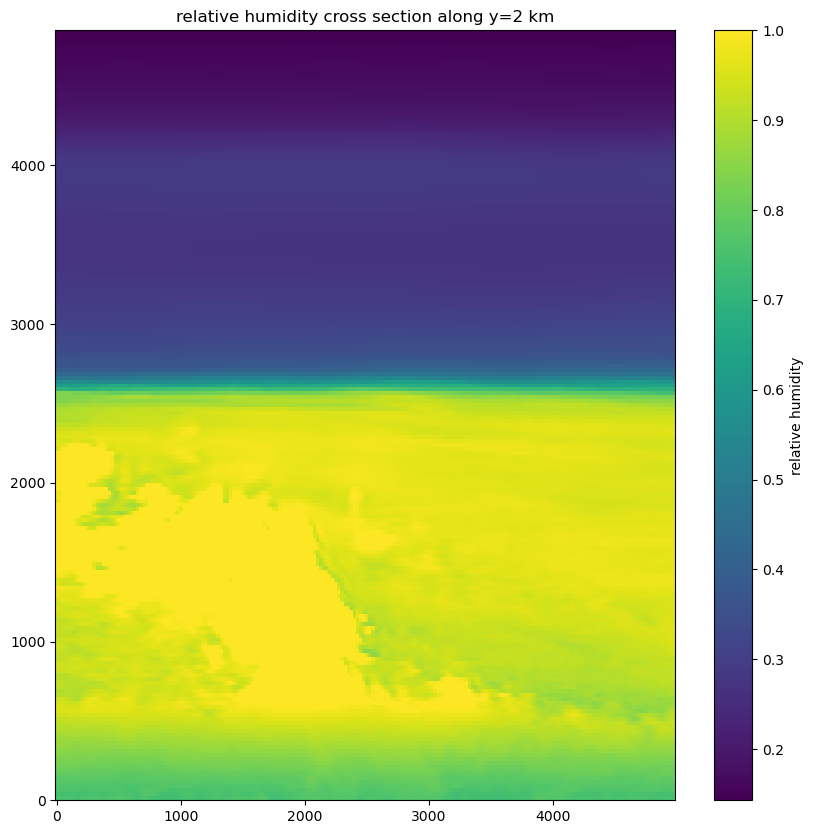

In [16]:
esat = find_esat(temp)
print(f'esat shape: {esat.shape}')
#
# broadcasting: add dimensions to the 1D pressure vectory so
# that it can be used in the denominator 
#
rsat = c.eps*esat/(press_np - esat)*1.e3  #convert to g/kg`
rh = qv/rsat

fig,ax = plt.subplots(1,1,figsize=(10,10))
vert_cross_sec_rh = rh[:,row_number_2000,:end_col]
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec_rh)
cax = plt.colorbar(image,ax=ax)
cax.set_label('relative humidity')
ax.set_title('relative humidity cross section along y=2 km');

## note the bimodal RH distribution -- boundary layer air is different from free atmos

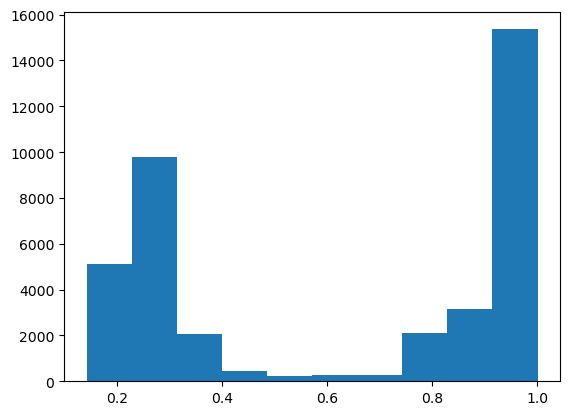

In [17]:
fig, ax = plt.subplots(1,1)
ax.hist(vert_cross_sec_rh.data.flat);

# make a palette that limits the range of colors

below 0.81 is gray, between 0.81 and 0.85 is black, more than 0.98 is red

Some links about colors:

* [matplotlib palettes](https://matplotlib.org/examples/color/colormaps_reference.html)

* [xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/)

* [xkcd colors from matplotlib](https://seaborn.pydata.org/generated/seaborn.xkcd_palette.html)

* [wikipedia article on RGB colors](https://en.wikipedia.org/wiki/RGB_color_model)

* use [a masked array](http://www.scipy-lectures.org/intro/numpy/numpy.html#masked-arrays) to eliminate some values

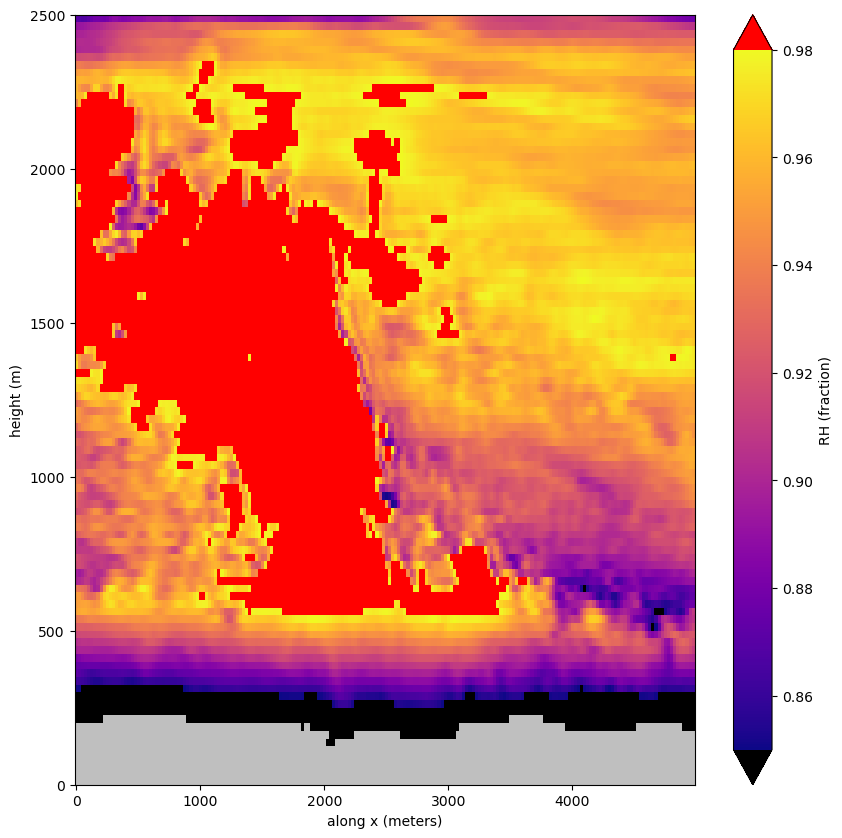

In [18]:
from matplotlib.colors import Normalize
fig,ax=plt.subplots(1,1,figsize=(10,10))
pal = plt.get_cmap('plasma')
pal.set_bad('0.75') #75% grey
pal.set_over('r')
pal.set_under('k')
vmin= 0.85
vmax= 0.98
#
#mask relative humidities > 1
#using a masked array
#
import numpy.ma as ma
mask = vert_cross_sec_rh < 0.81
ma_rh_vert = ma.array(vert_cross_sec_rh, mask = mask)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)
image=ax.pcolormesh(x[:end_col],z,ma_rh_vert,cmap=pal,norm=the_norm)
cax=plt.colorbar(image,ax = ax,extend='both')
cax.set_label('RH (fraction)')
ax.set(xlabel='along x (meters)',ylabel='height (m)')
ax.set(ylim=[0,2500]);


    

# Vertical profiles of mean and standard deviation for rh

focus on bottom 2500 meters

In [19]:
end_z = np.searchsorted(z,2500)
rh_subset_bottom= rh[:end_z,:end_row,:end_col]

the shape is (z,y,x) = axes (0,1,2)  so average over axes 1 and 2

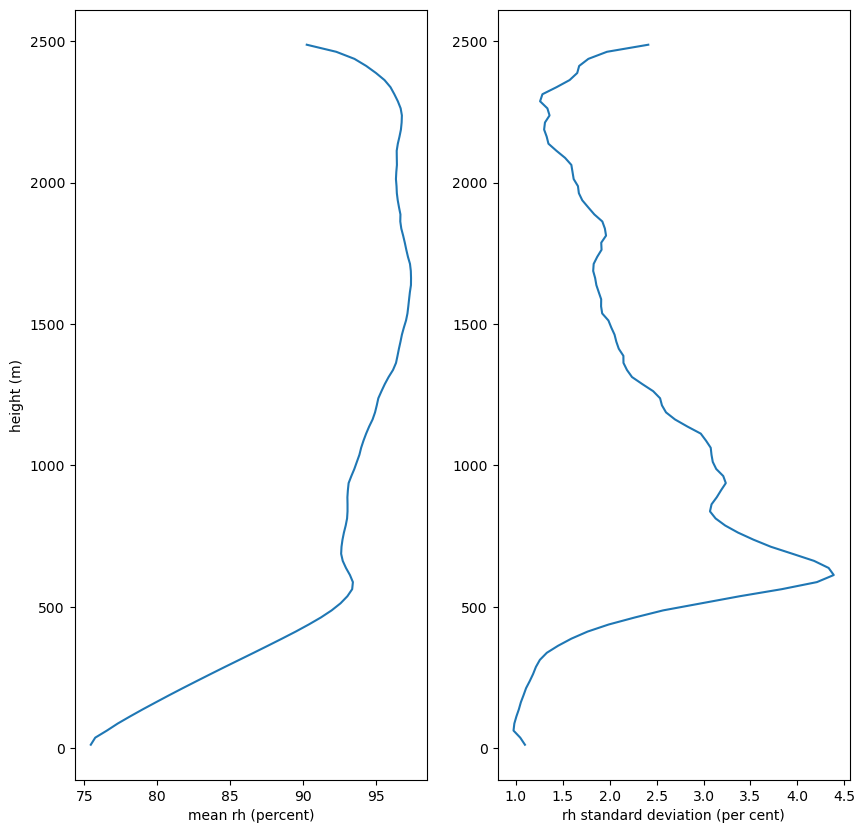

In [20]:
mean_rh_xy = rh_subset_bottom.mean(axis=(1,2))
sd_rh_xy = rh_subset_bottom.var(axis=(1,2))**0.5
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.plot(mean_rh_xy*100,z[:end_z])
ax2.plot(sd_rh_xy*100.,z[:end_z])
ax1.set(ylabel='height (m)',xlabel='mean rh (percent)')
ax2.set(xlabel='rh standard deviation (per cent)');

In [21]:
mask = rh_subset_bottom > 1
ma_rh_subset = ma.array(rh_subset_bottom,mask=mask)
#help(ma_rh_subset.mean)
rh_xyavg = ma_rh_subset.mean(axis = (1,2))

In [22]:
ma_rh_subset.shape

(100, 180, 200)